In [1]:
from piano_transcription_inference import PianoTranscription, sample_rate

/home/jongmin/.local/share/virtualenvs/piano_transcription-tc-tTbTr/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transcriptor = PianoTranscription(
    device="cuda", checkpoint_path="./model.pth"
)

Checkpoint path: ./model.pth
Using cuda for inference.


GPU number: 1


In [3]:
import torch

In [4]:
loaded = torch.load("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital13-15_MID--AUDIO_13_R1_2018_wav--2_encodec_decoded.pth")

In [9]:
pr_loaded = torch.load("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital13-15_MID--AUDIO_13_R1_2018_wav--2_pianoroll.pkl")

In [122]:
import torchaudio

In [175]:
wav_loaded, sr = torchaudio.load("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital13-15_MID--AUDIO_13_R1_2018_wav--2.wav")

In [176]:
sample_rate

16000

In [137]:
import librosa

In [177]:
wav_loaded = librosa.resample(wav_loaded.numpy(), sr, sample_rate)

In [178]:
wav_loaded.shape, sample_rate

((2, 24451463), 16000)

In [204]:
wav_loaded_30 = wav_loaded[..., 30*sample_rate:60*sample_rate]
wav_loaded_30.shape

(2, 480000)

In [205]:
wav_loaded_30 = wav_loaded_30.mean(0)
wav_loaded_30.shape

(480000,)

In [76]:
import torch
from tqdm import tqdm
import os

import mido
import numpy as np

In [97]:
loaded["len"]

51

In [169]:
pr_loaded["len"]

51

In [206]:
wav_out = transcriptor.transcribe(wav_loaded_30, 'transcription.mid')

Segment 0 / 5
Segment 1 / 5


Segment 2 / 5
Segment 3 / 5
Segment 4 / 5
Segment 5 / 5
Write out to transcription.mid


In [154]:
loaded[30].shape

torch.Size([1, 1, 960000])

In [207]:
loaded_resampled = librosa.resample(loaded[30].numpy().squeeze(), 32000, sample_rate)
loaded_resampled.shape

(480000,)

In [208]:
out = transcriptor.transcribe(loaded_resampled, 'transcription.mid')

Segment 0 / 5


Segment 1 / 5
Segment 2 / 5
Segment 3 / 5
Segment 4 / 5
Segment 5 / 5
Write out to transcription.mid


In [7]:
from matplotlib import pyplot as plt

In [186]:
out['output_dict']['onset_output'].shape

(3000, 88)

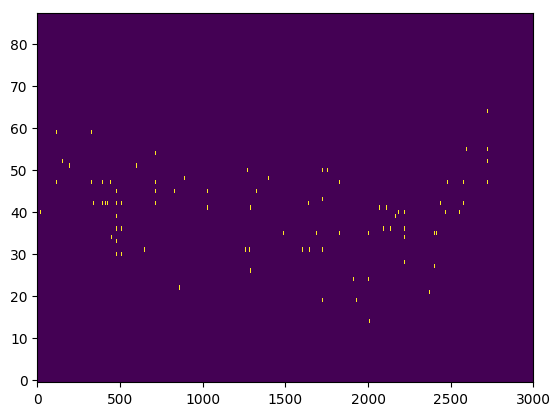

In [194]:
plt.imshow(out['output_dict']['onset_output'].T, aspect='auto', origin='lower', interpolation='nearest')

In [170]:
pr_loaded[30][0].shape

torch.Size([88, 3000])

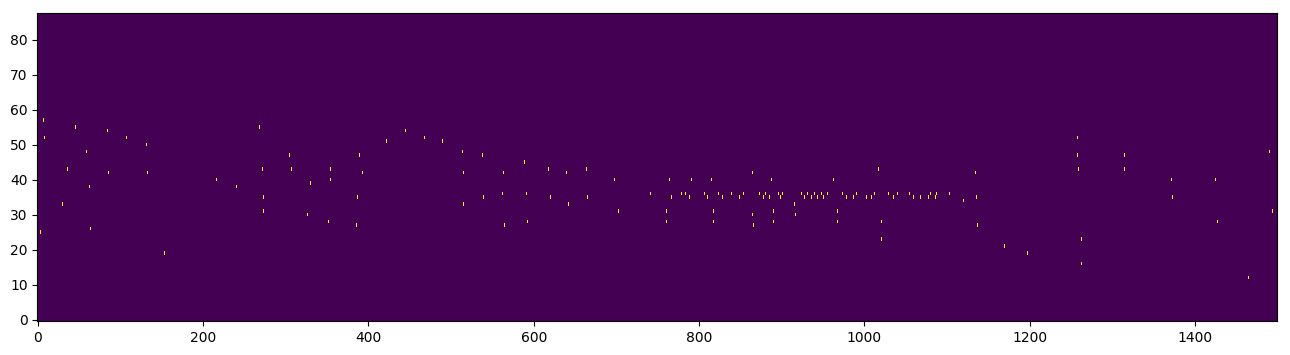

In [29]:
plt.figure(figsize = (16,4))
plt.imshow(pr_loaded[30][0], aspect='auto', origin='lower', interpolation='none')

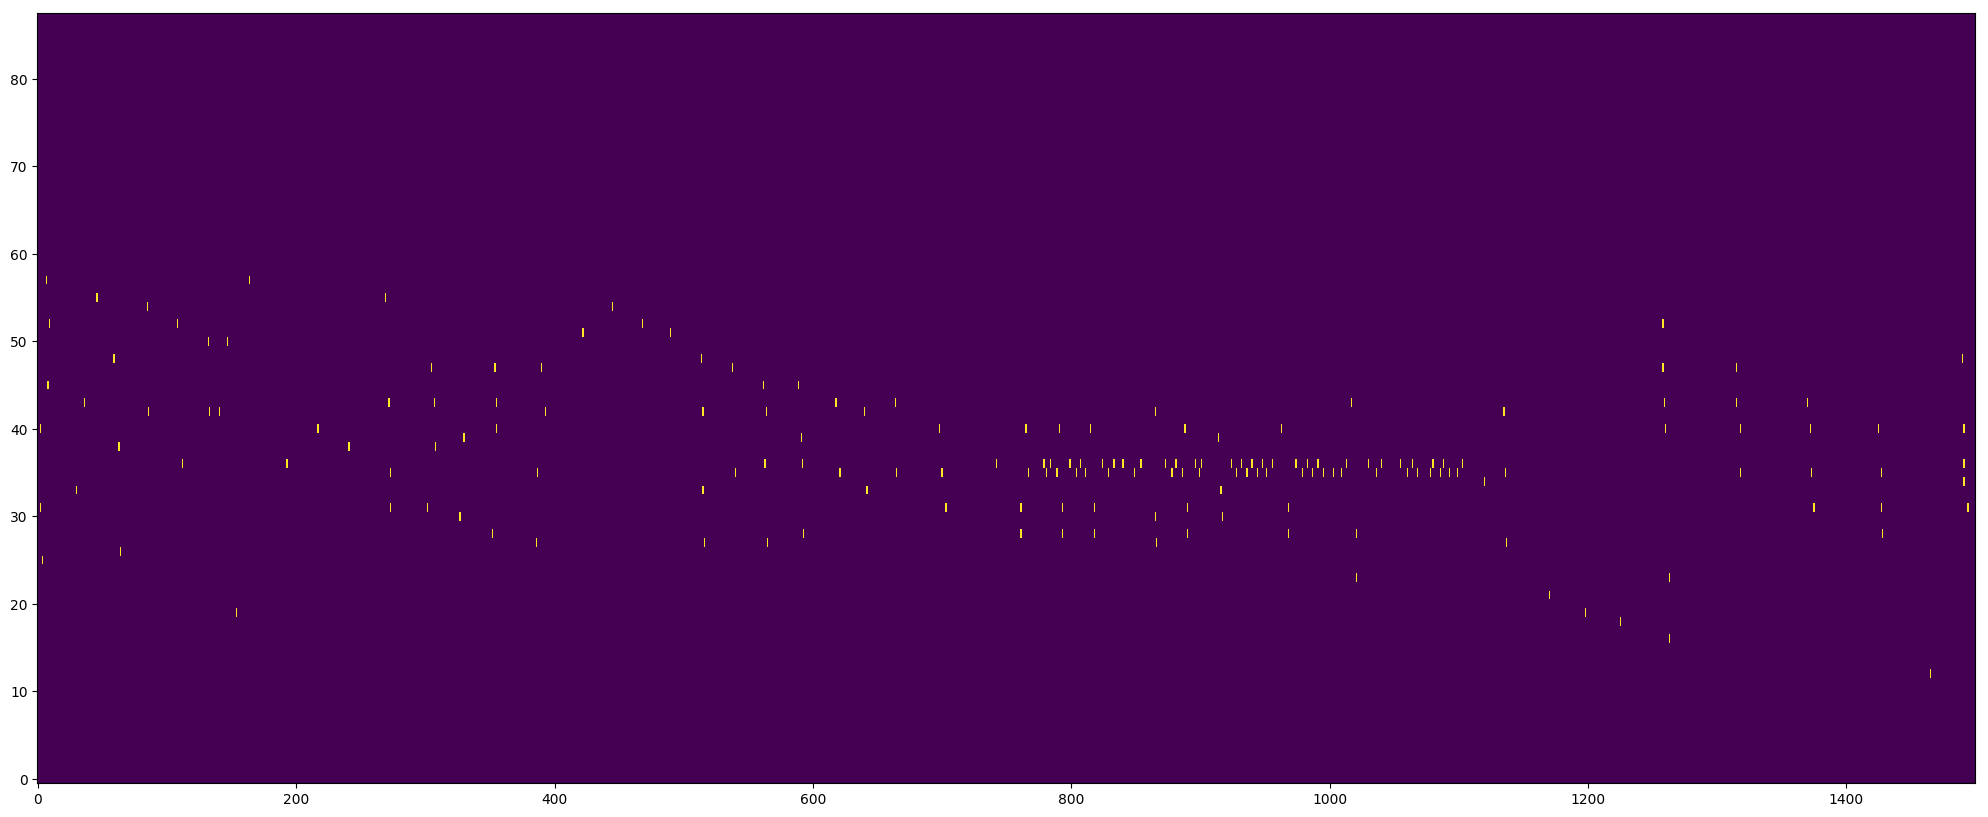

In [33]:
plt.figure(figsize = (25,10))
plt.imshow(pr_loaded[30][0], aspect='auto', origin='lower', interpolation='none')

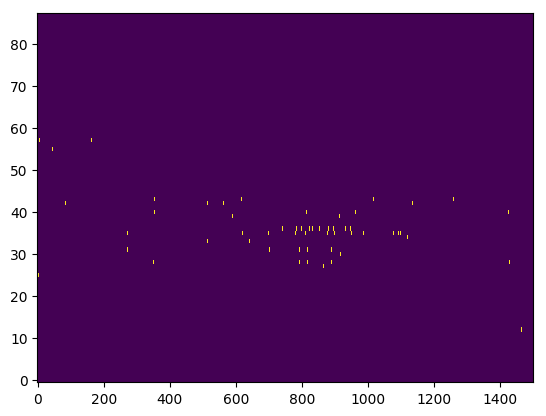

In [10]:
plt.imshow(pr_loaded[30][0], aspect='auto', origin='lower', interpolation='nearest')

In [159]:
wav_out['output_dict']['onset_output'].shape

(3000, 88)

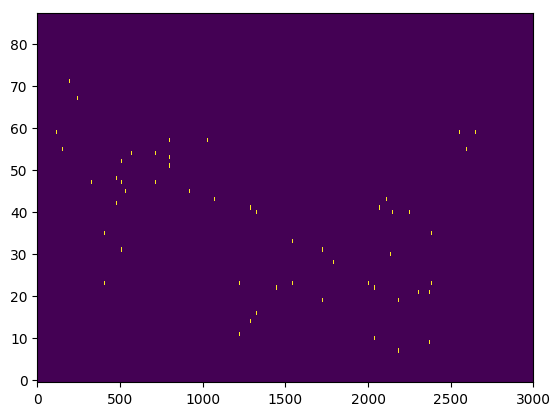

In [199]:
plt.imshow(wav_out['output_dict']['onset_output'].T, aspect='auto', origin='lower', interpolation='nearest')

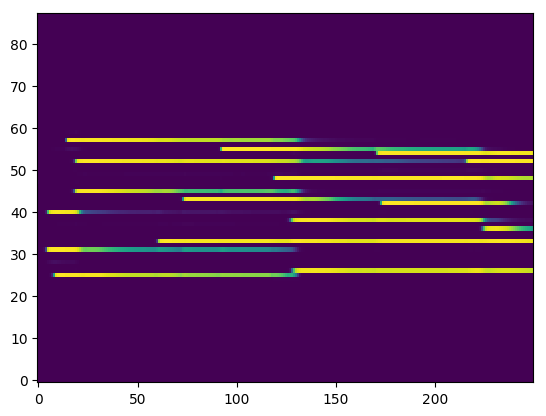

In [211]:
plt.imshow(wav_out['output_dict']['frame_output'].T[...,:250], aspect='auto', origin='lower', interpolation='nearest')

In [23]:
out['output_dict'].keys()

dict_keys(['reg_onset_output', 'reg_offset_output', 'frame_output', 'velocity_output', 'reg_pedal_onset_output', 'reg_pedal_offset_output', 'pedal_frame_output', 'onset_output', 'onset_shift_output', 'offset_output', 'offset_shift_output', 'pedal_offset_output', 'pedal_offset_shift_output'])

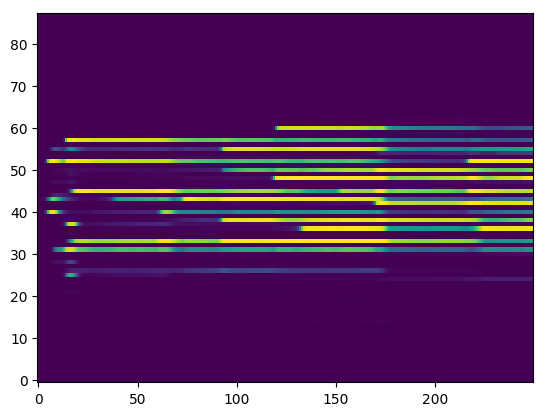

: 

In [212]:
plt.imshow(out['output_dict']['frame_output'].T[...,:250], aspect='auto', origin='lower', interpolation='nearest')

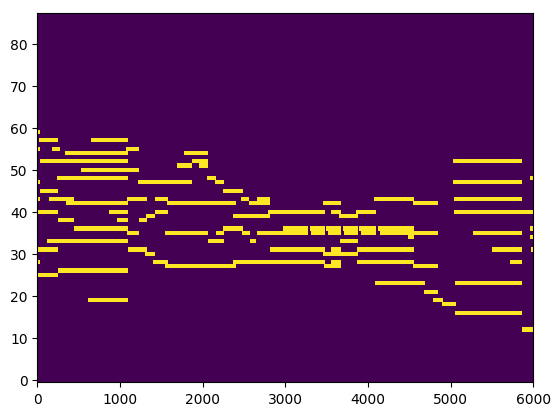

In [114]:
plt.imshow(pr_loaded[30][1], aspect='auto', origin='lower', interpolation='nearest')

In [14]:
out

{'output_dict': {'reg_onset_output': array([[9.3202323e-07, 1.0075738e-06, 6.9962215e-07, ..., 6.5392686e-07,
          5.1889276e-07, 2.3675744e-07],
         [1.8076001e-07, 1.3389280e-07, 2.0412513e-07, ..., 8.2386684e-08,
          4.2481975e-08, 3.3686035e-08],
         [8.9316536e-08, 6.5938956e-08, 1.2171968e-07, ..., 4.3447038e-08,
          1.8194415e-08, 1.5068087e-08],
         ...,
         [2.8385737e-04, 5.7781523e-04, 2.7383910e-04, ..., 1.3206125e-04,
          9.7606717e-05, 1.4656539e-04],
         [1.6126431e-04, 3.1027370e-04, 1.6638539e-04, ..., 8.5508851e-05,
          6.0206021e-05, 8.5356267e-05],
         [4.8223024e-05, 5.7716010e-05, 5.1752348e-05, ..., 3.0680330e-05,
          1.6923352e-05, 2.1870761e-05]], dtype=float32),
  'reg_offset_output': array([[4.69224233e-07, 1.41746142e-07, 5.25861140e-07, ...,
          2.26786270e-08, 1.14268204e-07, 9.73759828e-09],
         [3.05483297e-07, 1.57259706e-07, 2.60432444e-07, ...,
          2.35709781e-08, 5.6938

In [13]:
import note_eval

In [53]:
torch.Tensor([out['output_dict']['onset_output'], out['output_dict']['frame_output']]).shape, pr_loaded[0].shape

/home/jongmin/.local/share/virtualenvs/piano_transcription-tc-tTbTr/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  """Entry point for launching an IPython kernel.


(torch.Size([2, 6000, 88]), torch.Size([2, 88, 1500]))

In [56]:
eval_out = note_eval.evaluate(torch.Tensor([out['output_dict']['onset_output'], out['output_dict']['frame_output']]).permute(0,2,1), pr_loaded[0], 0.5, 0.5)
eval_out

/home/jongmin/.local/share/virtualenvs/piano_transcription-tc-tTbTr/lib/python3.7/site-packages/mir_eval/multipitch.py:275: UserWarning: Estimate frequencies are all empty.
  warnings.warn("Estimate frequencies are all empty.")


defaultdict(list,
            {'metric/note/precision': [0.025240384615384616],
             'metric/note/recall': [0.02182952182952183],
             'metric/note/f1': [0.023411371237458196],
             'metric/note/overlap': [0.13197496179809878],
             'metric/note-with-offsets/precision': [0.0],
             'metric/note-with-offsets/recall': [0.0],
             'metric/note-with-offsets/f1': [0.0],
             'metric/note-with-offsets/overlap': [0],
             'metric/frame/f1': [0.0],
             'metric/frame/precision': [0.0],
             'metric/frame/recall': [0.0],
             'metric/frame/accuracy': [0.0],
             'metric/frame/substitution_error': [0.0],
             'metric/frame/miss_error': [1.0],
             'metric/frame/false_alarm_error': [0.0],
             'metric/frame/total_error': [1.0],
             'metric/frame/chroma_precision': [0.0],
             'metric/frame/chroma_recall': [0.0],
             'metric/frame/chroma_accuracy': [0.0]

In [ ]:
extracted_notes = note_eval.extract_notes(torch.Tensor(out['output_dict']['onset_output']), torch.Tensor(out['output_dict']['frame_output']), None, 0.5, 0.5)
extracted_notes

In [39]:
# pitches = []
# intervals = []
# shape = [6000,88]
# for event in out['est_note_events']:
#     pitches.append(event["midi_note"]-21)
#     intervals.append([event["onset_time"], event["offset_time"]])

In [42]:
ntf_out = note_eval.notes_to_frames(pitches, intervals, shape)

TypeError: slice indices must be integers or None or have an __index__ method

In [6]:
for i in range(loaded["len"]-1):
    loaded[i*30].squeeze()

In [3]:
import os
from tqdm import tqdm

In [6]:
for dirpath, dirnames, filenames in os.walk("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/"):
    for filename in tqdm([f for f in filenames if f.endswith(".mid")]):
        os.remove(os.path.join(dirpath, filename))
        

0it [00:00, ?it/s]
100%|██████████| 1907/1907 [00:00<00:00, 33028.88it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [8]:
import torch

/home/jongmin/.local/share/virtualenvs/piano_transcription-tc-tTbTr/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
splits = torch.load("/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/maestro-v3.0.0_split.pt")
val_split = splits["validation"]

In [10]:
val_split

['2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MID--AUDIO_17_R1_2006_04_Track04_wav.midi',
 '2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MID--AUDIO_07_R1_2009_07_R1_2009_04_WAV.midi',
 '2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MID--AUDIO_02_R1_2009_02_R1_2009_05_WAV.midi',
 '2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MID--AUDIO_11_R1_2009_11_R1_2009_06_WAV.midi',
 '2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_03_R1_2013_wav--4.midi',
 '2014/MIDI-UNPROCESSED_14-15_R1_2014_MID--AUDIO_15_R1_2014_wav--3.midi',
 '2014/MIDI-UNPROCESSED_14-15_R1_2014_MID--AUDIO_15_R1_2014_wav--4.midi',
 '2006/MIDI-Unprocessed_22_R1_2006_01-04_ORIG_MID--AUDIO_22_R1_2006_02_Track02_wav.midi',
 '2018/MIDI-Unprocessed_Recital8_MID--AUDIO_08_R1_2018_wav--2.midi',
 '2018/MIDI-Unprocessed_Recital9-11_MID--AUDIO_10_R1_2018_wav--5.midi',
 '2008/MIDI-Unprocessed_02_R1_2008_01-05_ORIG_MID--AUDIO_02_R1_2008_wav--3.midi',
 '2013/ORIG-MIDI_02_7_6_13_Group__MID--AUDIO_06_R1_2013_wav--4.midi',
 '2011/MIDI-Unprocessed_16_R1_